# Hourly Energy Consumption

PJM Interconnection LLC (PJM) is a regional transmission organization (RTO) in the United States. It is part of the Eastern Interconnection grid operating an electric transmission system serving all or parts of Delaware, Illinois, Indiana, Kentucky, Maryland, Michigan, New Jersey, North Carolina, Ohio, Pennsylvania, Tennessee, Virginia, West Virginia, and the District of Columbia.

![PJM LOGO](https://s3.amazonaws.com/attachments.readmedia.com/files/46205/original/PJM.jpg?1358357550)

### Import Packages and Data

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
color_pal = sns.color_palette()
plt.style.use('ggplot')

In [56]:
color_pal

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [2]:
df = pd.read_csv('PJMW_hourly.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143206 entries, 2002-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PJMW_MW  143206 non-null  float64
dtypes: float64(1)
memory usage: 2.2 MB


### Visualization

---

<Axes: title={'center': 'PJMW Usage'}, xlabel='Datetime'>

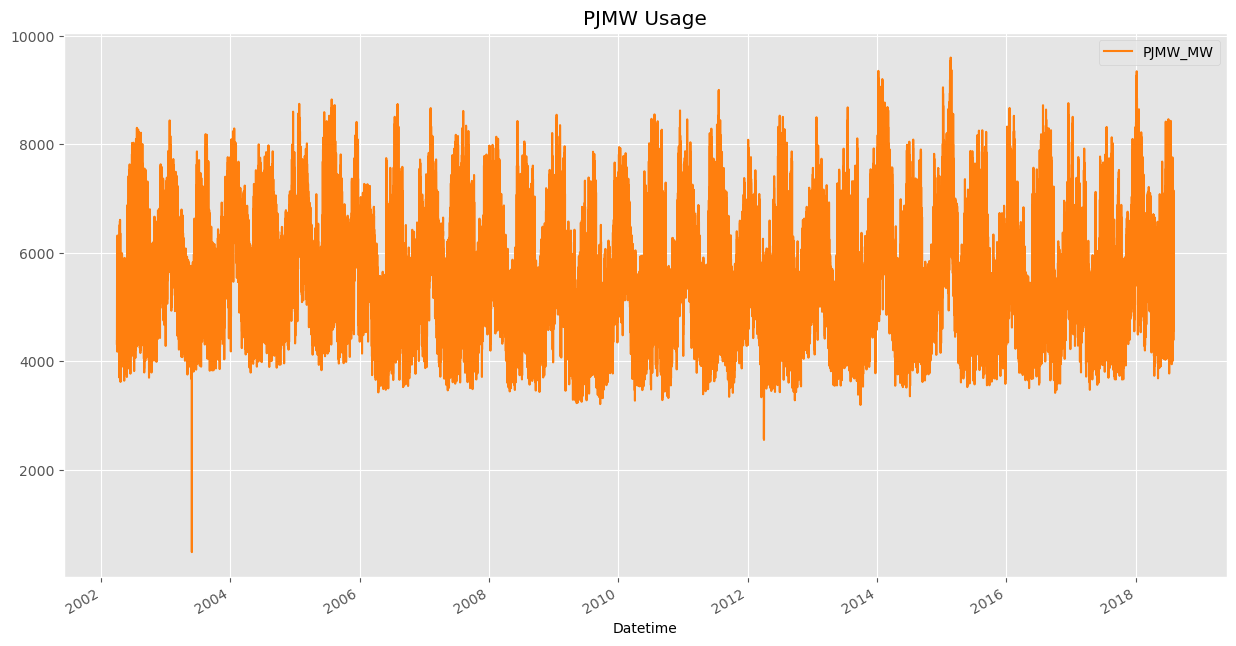

In [4]:
df.plot(figsize = (15,8), color = color_pal[1], title = 'PJMW Usage')

In [5]:
df

,PJMW_MW
Datetime,
2002-12-31 01:00:00,5077.0
2002-12-31 02:00:00,4939.0
2002-12-31 03:00:00,4885.0
2002-12-31 04:00:00,4857.0
2002-12-31 05:00:00,4930.0
...,...
2018-01-01 20:00:00,8401.0
2018-01-01 21:00:00,8373.0
2018-01-01 22:00:00,8238.0


In [6]:
#split data
train = df.loc[df.index < '2015-01-01']
test = df.loc[df.index >= '2015-01-01']

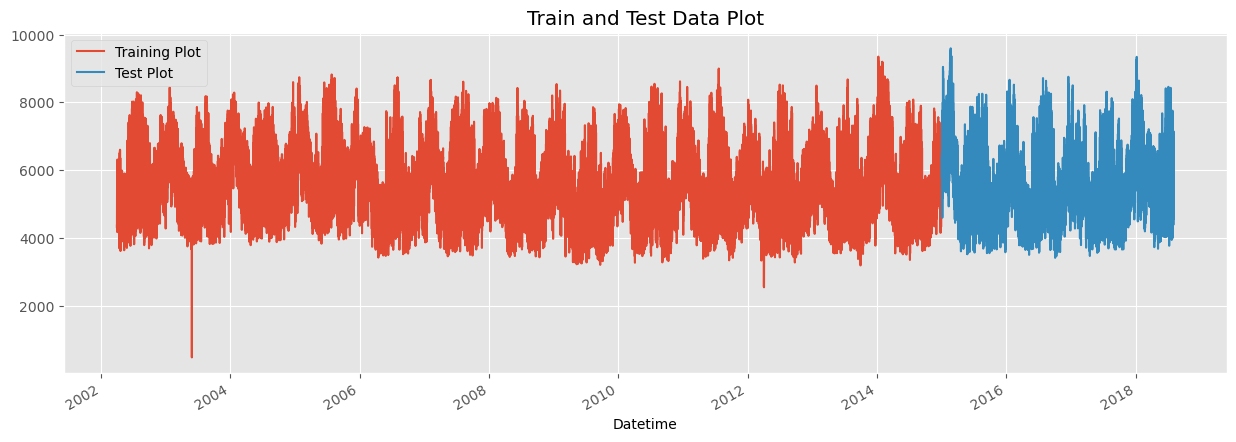

In [7]:
#plot train data
fig, ax = plt.subplots(figsize = (15,5))
train.plot(ax = ax, label = 'Training plot', title = 'Train and Test Data Plot')
test.plot(ax = ax, label = 'Test plot')
ax.legend(['Training Plot', 'Test Plot'])
plt.show()

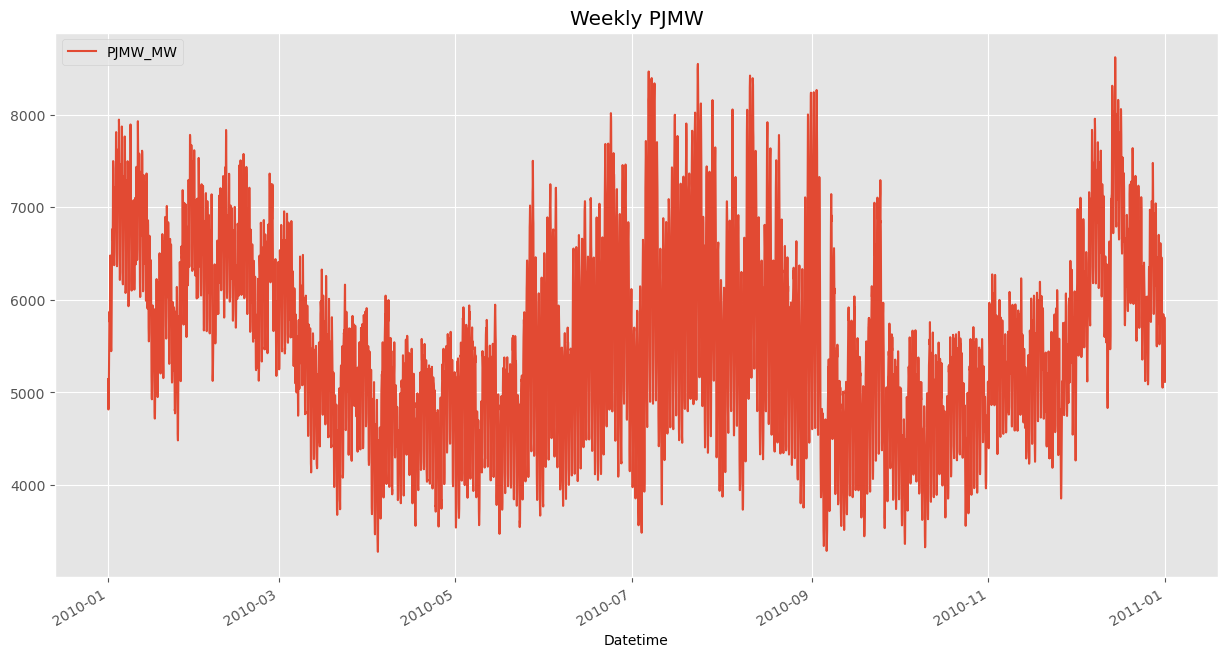

In [8]:
#plot monthly from january 2010 to dec 2010
df.loc[(df.index > '2010-01-01') & (df.index < '2011-01-01')]\
.plot(figsize= (15,8), title = 'Weekly PJMW')
plt.show()

### Feature Creation

---

In [9]:
# Create feature from date
def create_feature (data):
    data = data.copy()
    data['hour'] = data.index.hour
    data['dayofweek'] = data.index.dayofweek
    data['quarter'] = data.index.quarter
    data['month'] = data.index.month
    data['year'] = data.index.year
    data['dayofyear'] = data.index.dayofyear
    data['dayofmonth'] = data.index.day
    data['weekofyear'] = data.index.isocalendar().week
    return data

df_new = create_feature(df)

### Visualize Feature/Target Correlation

---

<Axes: >

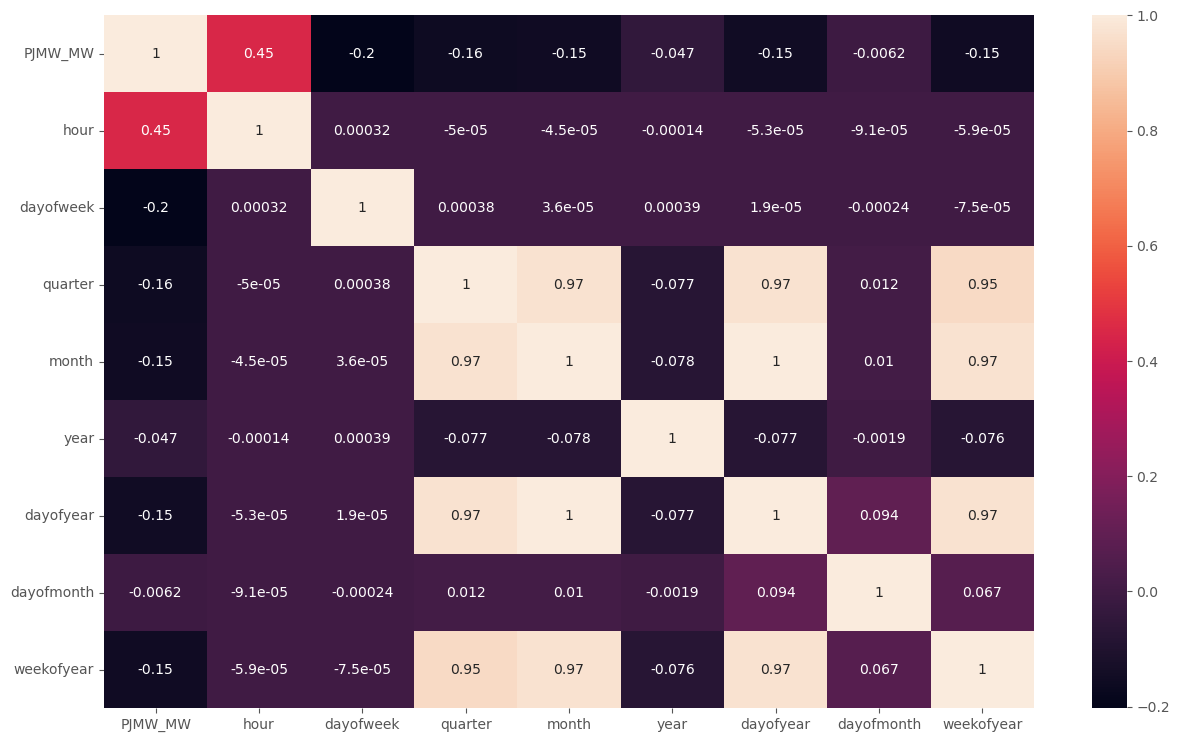

In [10]:
# Pearson Correlation Plot
plt.figure(figsize = (15,9))
sns.heatmap(df_new.corr(), annot = True)

<Axes: xlabel='hour', ylabel='PJMW_MW'>

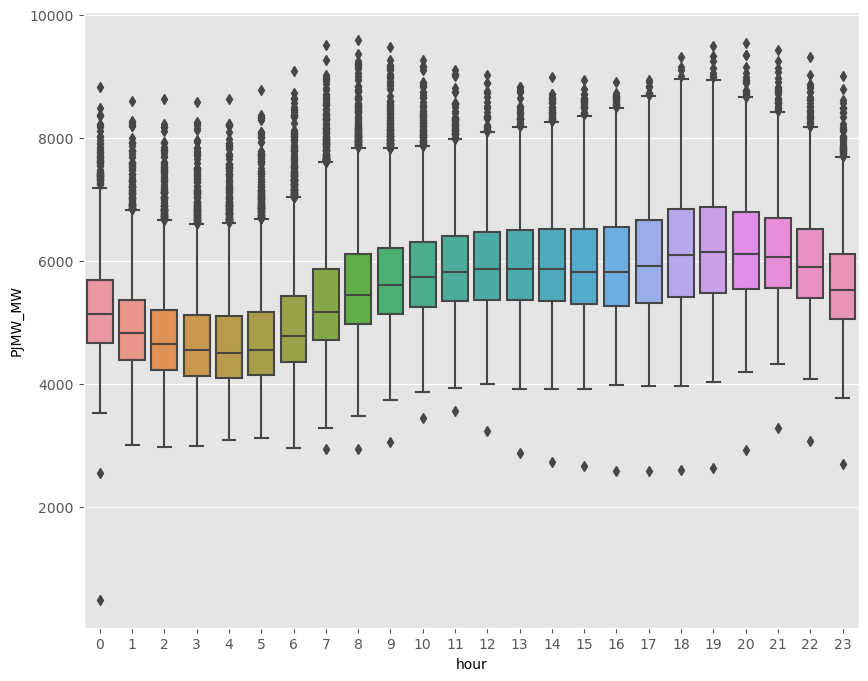

In [11]:
# Electicity usage per hour
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data = df_new, x = 'hour', y = 'PJMW_MW')

<Axes: xlabel='dayofweek', ylabel='PJMW_MW'>

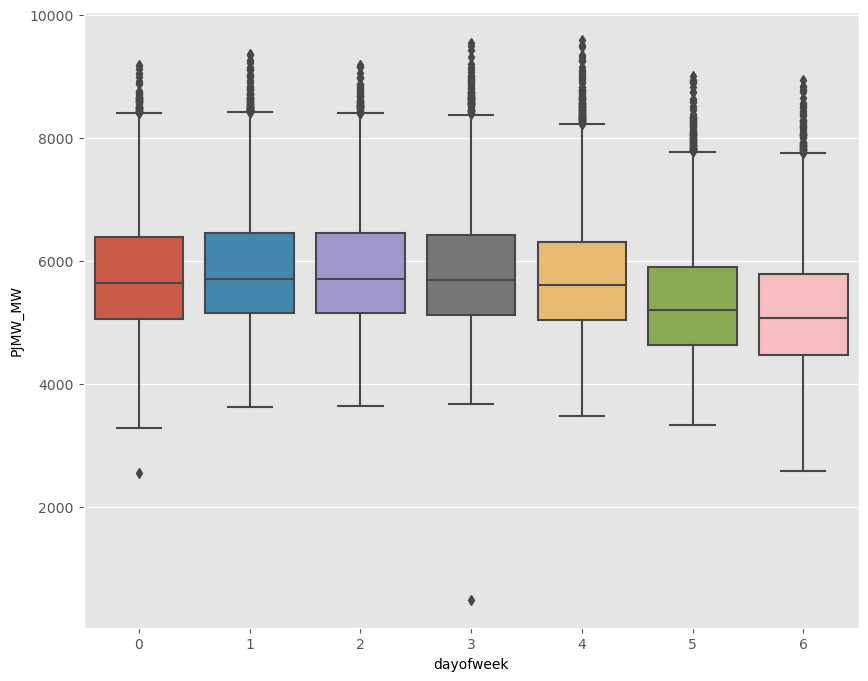

In [12]:
# Average electricity consumption on a week
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data = df_new, x = 'dayofweek', y = 'PJMW_MW')

<Axes: xlabel='quarter', ylabel='PJMW_MW'>

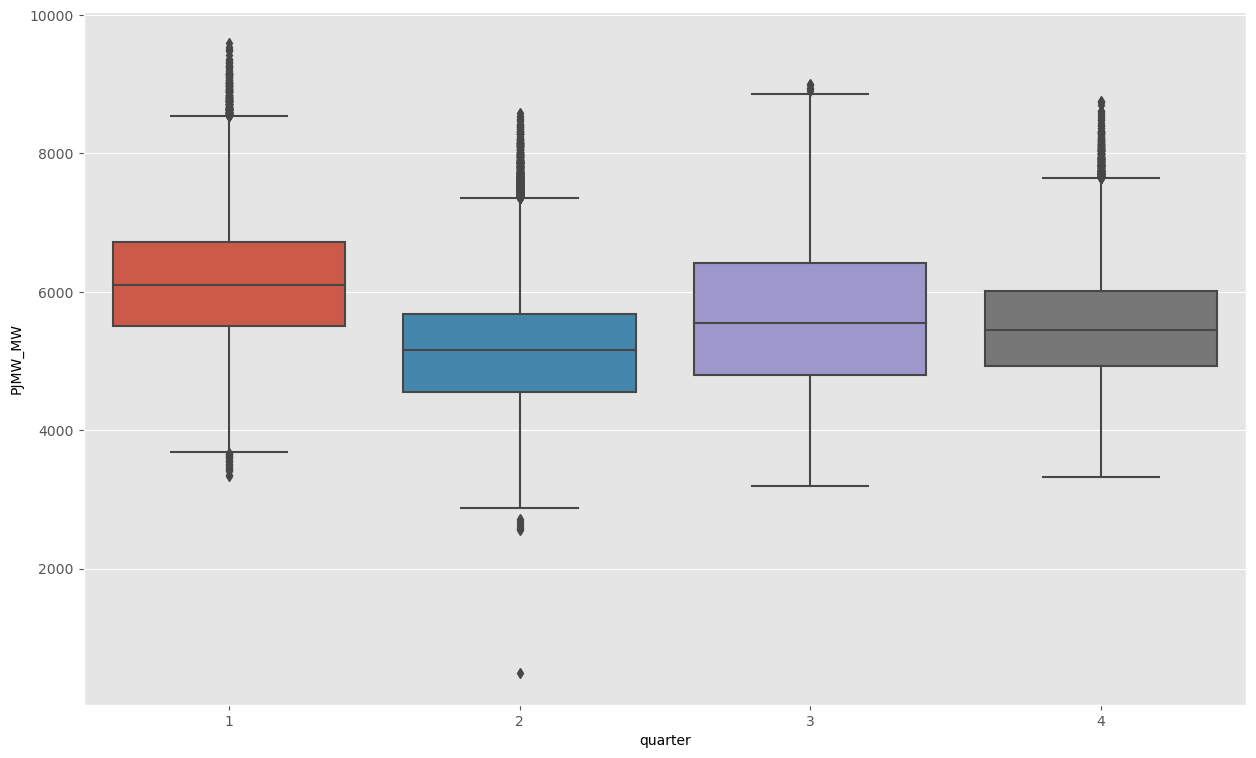

In [13]:
# PJMW quarter consumption
fig, ax = plt.subplots(figsize = (15,9))
sns.boxplot(data = df_new, x = 'quarter', y = 'PJMW_MW')

### Create model

In [14]:
# Feature target separation
train = create_feature(train)
test = create_feature(test)

feature =['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear','dayofmonth']
target = 'PJMW_MW'

X_train = train[feature]
y_train = train[target]

X_test = test[feature]
y_test = test[target]

In [15]:
X_train

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth
Datetime,,,,,,,
2002-12-31 01:00:00,1,1,4,12,2002,365,31
2002-12-31 02:00:00,2,1,4,12,2002,365,31
2002-12-31 03:00:00,3,1,4,12,2002,365,31
2002-12-31 04:00:00,4,1,4,12,2002,365,31
2002-12-31 05:00:00,5,1,4,12,2002,365,31
...,...,...,...,...,...,...,...
2014-01-01 20:00:00,20,2,1,1,2014,1,1
2014-01-01 21:00:00,21,2,1,1,2014,1,1
2014-01-01 22:00:00,22,2,1,1,2014,1,1


In [25]:
y_train.shape

(111766,)

In [26]:
X_test.shape

(31440, 7)

In [27]:
y_test.shape

(31440,)

In [45]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

reg = xgb.XGBRegressor(n_estimators = 1000, objective =  'reg:linear', max_depth = 3, booster = 'gbtree', learning_rate = 0.1)

reg.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_test, y_test)], verbose = 50)

[13:24:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5122.60781	validation_1-rmse:5145.37894
[50]	validation_0-rmse:523.39535	validation_1-rmse:667.32825
[100]	validation_0-rmse:476.30820	validation_1-rmse:665.86561
[150]	validation_0-rmse:451.97457	validation_1-rmse:661.14010
[200]	validation_0-rmse:437.29144	validation_1-rmse:660.28637
[250]	validation_0-rmse:427.87030	validation_1-rmse:662.24609
[300]	validation_0-rmse:418.68640	validation_1-rmse:666.67459
[350]	validation_0-rmse:411.89050	validation_1-rmse:669.43125
[400]	validation_0-rmse:406.43251	validation_1-rmse:672.71235
[450]	validation_0-rmse:401.25882	validation_1-rmse:673.05109
[500]	validation_0-rmse:397.08217	validation_1-rmse:673.41714
[550]	validation_0-rmse:392.96635	validation_1-rmse:672.10405
[600]	validation_0-rmse:39

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

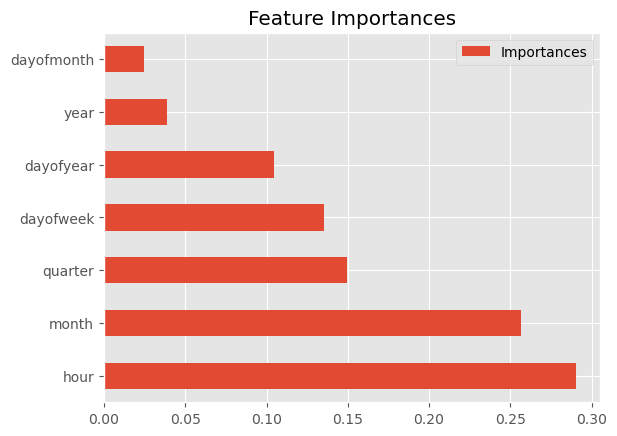

In [46]:
# Feature Importances
fi = pd.DataFrame(data = reg.feature_importances_, index = reg.feature_names_in_,  columns=['Importances'])
fi.sort_values('Importances',ascending = False).plot(kind = 'barh', title = 'Feature Importances')
plt.show()

Importaces of the hour feature is the most than any features. 

### Forecast on test

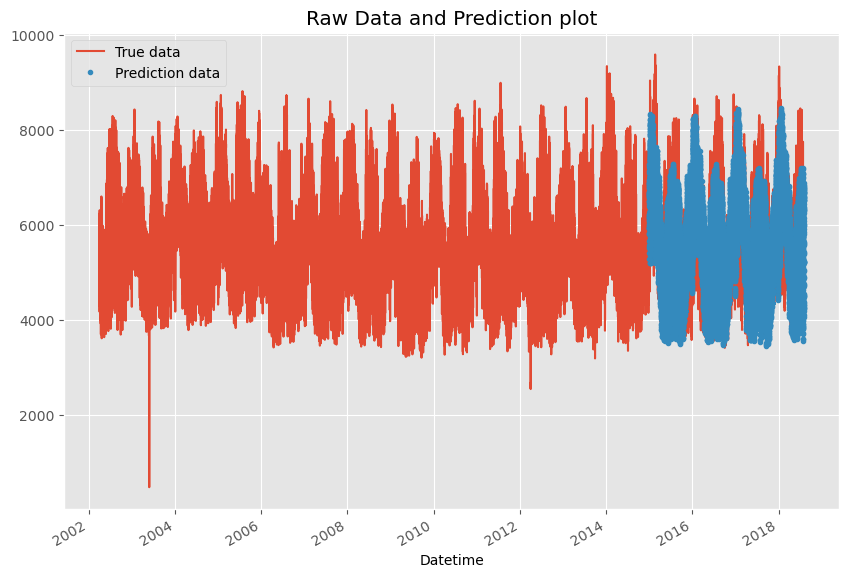

In [48]:
test ['Prediction'] = reg.predict(X_test)
df_new = df_new.merge(test[['Prediction']], how ='left', left_index = True, right_index=True)
ax = df_new[['PJMW_MW']].plot(figsize = (10,7))
df_new['Prediction'].plot(ax=ax, style = '.')
plt.legend(['True data', 'Prediction data'])
ax.set_title('Raw Data and Prediction plot')
plt.show()

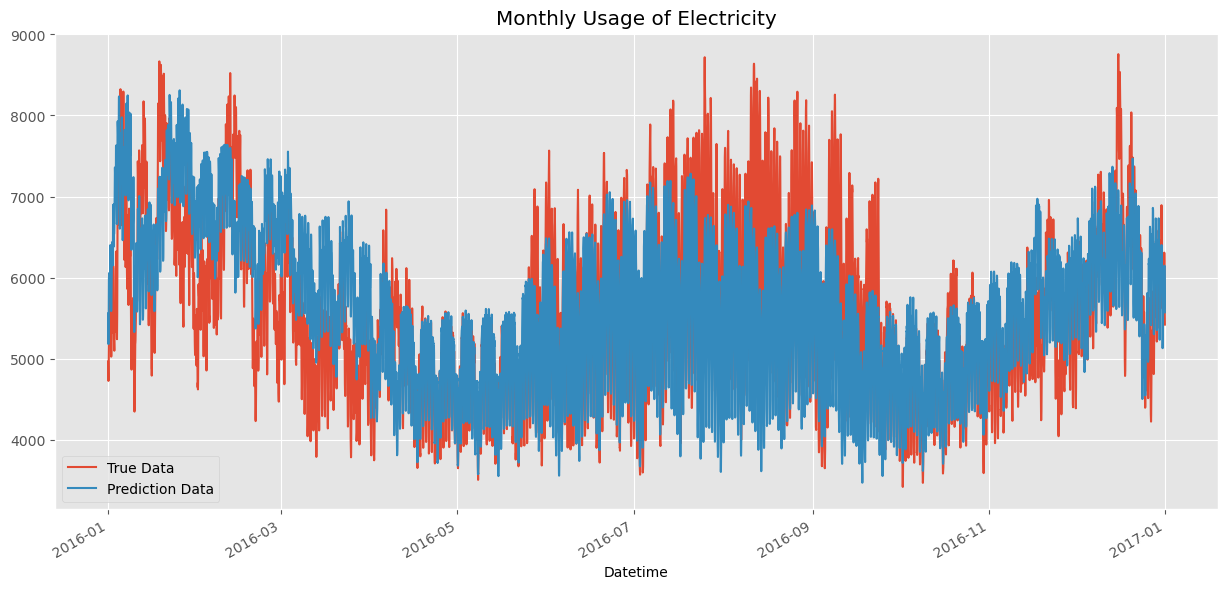

In [49]:
ax = df_new.loc[(df_new.index > '2016-01-01') & (df_new.index < '2017-01-01')]['PJMW_MW'].plot(figsize = (15,7), title = 'Monthly Usage of Electricity')
ax = df_new.loc[(df_new.index >'2016-01-01') & (df_new.index < '2017-01-01')]['Prediction'].plot(style = '-')
plt.legend(['True Data', 'Prediction Data'])
plt.show()

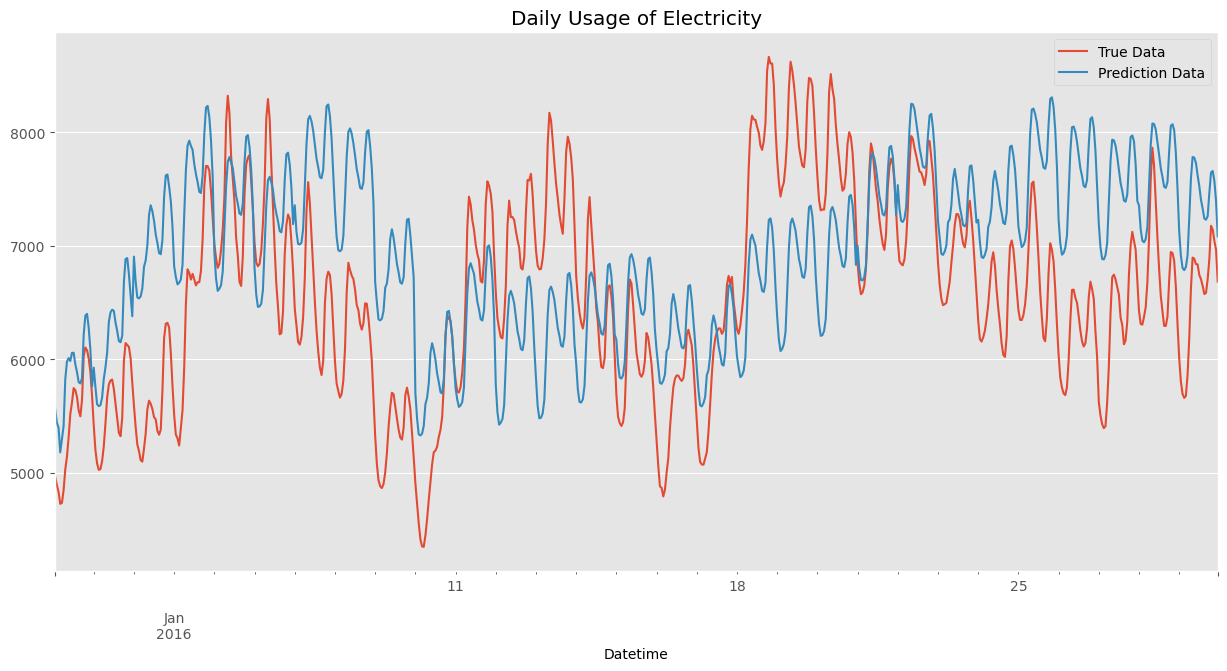

In [51]:
ax = df_new.loc[(df_new.index > '2016-01-01') & (df_new.index < '2016-01-30')]['PJMW_MW'].plot(figsize = (15,7), title = 'Daily Usage of Electricity')
ax = df_new.loc[(df_new.index >'2016-01-01') & (df_new.index < '2016-01-30')]['Prediction'].plot(style = '-')
plt.legend(['True Data', 'Prediction Data'])
plt.show()

## Error Calculation

In [53]:
from sklearn.metrics import mean_squared_error
import numpy as np
score = np.sqrt(mean_squared_error(test['PJMW_MW'], test['Prediction']))
print(f'RMSE Score of Prediction is {score:.2f}')

RMSE Score of Prediction is 688.31


In [57]:
test['Error'] = np.abs(test[target] - test['Prediction'])
test['date']  = test.index.date
test.groupby(['date'])['Error'].mean().sort_values(ascending = False).head()

date
2017-01-22    2337.758138
2017-01-25    2261.948771
2018-01-22    2211.779907
2018-01-23    2089.763509
2018-01-06    2042.092672
Name: Error, dtype: float64